<a href="https://colab.research.google.com/github/SusanmckDIT/Work-code/blob/master/Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Regression (with a Neural Network)

Let's set up an example with that toy data that we have been looking at. This is a much much simpler example that we would normally work with, but it is useful to see what is going on. 

## Step 1: Let's set up the Data 

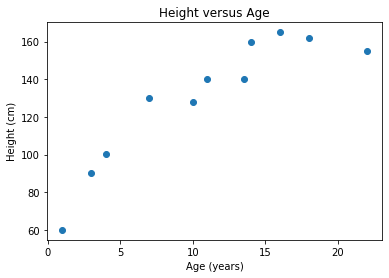

In [ ]:
# import tensorflow, numpy, and graphing libraries
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# create our training data 
x_train = np.array([1,3,4,7,10,11,14,13.5,16,18,22])
y_train = np.array([60,90,100.5,130,128,140,160,140,165,162,155])

# plot our training data 
plt.plot(x_train,y_train, "o")
plt.title('Height versus Age')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.show()

## Step 2: Let's Build a Basic Model and visualise the Accuracy Improvement over epochs 

Final MAPE: 2.4797167498036288e-05


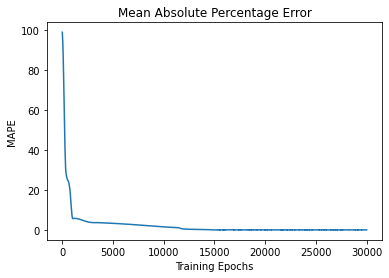

In [ ]:
# Create a simple sequential network object
model = tf.keras.models.Sequential()
# Let's define our hidden layers. (Tensorflow will figure out the input layer from the data we give it)
model.add(tf.keras.layers.Dense(32, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(32, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(10))
# Let's define our output layer. We have a single regression problem, so our output
# layer is a single neuron without an associated non-linear activation function. 
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mape"])

# Start the training process
history = model.fit(x=x_train, y=y_train, epochs=30000, verbose=0) 

plt.plot(history.history['mape'])
plt.title('Mean Absolute Percentage Error')
plt.xlabel('Training Epochs')
plt.ylabel('MAPE')

print("Final MAPE:",history.history['mape'][-1])

## Step 3: Use some 'test' data 

We are going to gnerate some new input data points, generate predictions, and then plot the results 

In [ ]:
# Create the new datapoints (and print them so we are clear on what we have)
x_test = np.arange(0,22,0.3)
print(x_test)

[ 0.   0.3  0.6  0.9  1.2  1.5  1.8  2.1  2.4  2.7  3.   3.3  3.6  3.9
  4.2  4.5  4.8  5.1  5.4  5.7  6.   6.3  6.6  6.9  7.2  7.5  7.8  8.1
  8.4  8.7  9.   9.3  9.6  9.9 10.2 10.5 10.8 11.1 11.4 11.7 12.  12.3
 12.6 12.9 13.2 13.5 13.8 14.1 14.4 14.7 15.  15.3 15.6 15.9 16.2 16.5
 16.8 17.1 17.4 17.7 18.  18.3 18.6 18.9 19.2 19.5 19.8 20.1 20.4 20.7
 21.  21.3 21.6 21.9]


In [ ]:
# Generate predictions for each individual case
predictions = model.predict(x_test)
predictions = predictions.flatten()
print(predictions)

[ 47.24317   50.51056   54.263195  58.492542  63.14009   68.08378
  73.13616   78.062515  82.62185   86.62501   89.99991   92.86008
  95.59616   99.008575 104.279884 112.00033  120.33649  126.22877
 129.08992  130.15666  130.4405   130.41487  130.2675   130.0708
 129.85387  129.62929  129.4032   129.17897  128.95888  128.74463
 128.53793  128.34068  128.15742  128.01524  128.15694  130.5255
 137.62477  140.37701  140.57625  140.51218  140.43855  140.36105
 140.19647  139.65315  139.0214   139.99988  150.14601  162.60788
 164.8616   165.06857  165.07944  165.0696   165.0514   165.0174
 164.95084  164.82426  164.59845  164.22722  163.67122  162.91837
 161.99995  160.98749  159.969    159.0196   158.18497  157.48106
 156.90314  156.43599  156.0611   155.76068  155.51941  155.32474
 155.16672  155.03761 ]


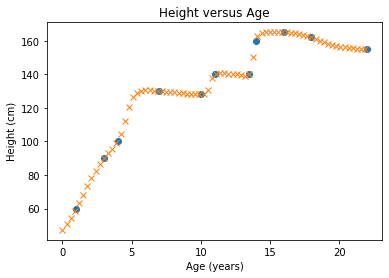

In [ ]:
# Print plot these over the original training data 
plt.plot(x_train,y_train, "o")
plt.plot(x_test,predictions, "x")
plt.title('Height versus Age')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.show()

OK.  so that model is a good fit. How about we retry and be bad machine learning people instead. Change the number of epochs to 30000 instead (add a zero), and re-run this notebook. What is your impression of the model performance now? 

Keep in mind that the same type of overfitting effect can be achieved with more sophisticated architectures as well as the addition of more training time. 